<a href="https://colab.research.google.com/github/madisonhgallagher/project_chd/blob/main/Coronary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('fhs_train.csv')

In [7]:
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [5]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns[1:5], '\n') # First five column names

(3180, 17) 

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object 

Index(['sex', 'age', 'education', 'currentSmoker'], dtype='object') 



It looks like all of our data is already either a float or an integer, which is helpful for analysis.

In [12]:
print(df.iloc[0:5,1:17],'\n') # Show the zero to fourth rows/first to seventeenth columns

   sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   58        1.0              0         0.0     0.0                0   
1    0   40        1.0              1        15.0     0.0                0   
2    0   52        1.0              0         0.0     0.0                0   
3    1   38        2.0              1        43.0     0.0                0   
4    0   43        1.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    220.0  143.0  104.0  29.85         75     87.0   
1             0         0    199.0  122.0   82.0  22.16         85     77.0   
2             0         0    275.0  112.0   71.0  25.68         80      NaN   
3             1         0    170.0  130.0   94.0  23.90        110     75.0   
4             0         0    202.0  124.0   92.0  21.26         75     74.0   

   TenYearCHD  
0           1  
1           0  
2       

#Observing the distribution of different variables

In [ ]:
df['sex']
var = 'sex'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

In [ ]:
df['age']
var = 'age'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

In [ ]:
var = 'education'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

In [ ]:
var = 'currentSmoker'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

In [ ]:
var = 'cigsPerDay'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

In [ ]:
var = 'BPMeds'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

## Dealing with missing data

**Variable 1: Sex**

In [ ]:
var = 'sex'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['sex_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['sex_NA']),'\n') # How many missing values are there?

There are no missing values for sex.

**Variable 2: Age**

In [ ]:
var = 'age'
print('Before coercion: \n', df[var].describe(),'\n') # The age variable is not read by Pandas as a number
df[var].hist(bins=50) # Initial histogram; check out the x axis

In [ ]:
var = 'age'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['age_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['age_NA']),'\n') # How many missing values are there?

There are no missing age variables.

**Variable 3: Education**

In [ ]:
var = 'education'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['education_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['education_NA']),'\n') # How many missing values are there?

There are 85 missing education variables. 85/3180 is ~2.6% of our total data so it is still a relatively small number of missing values.The mean is 1.9. Since the integers represent categories of efucation that means that average amount of education someone has is some highschool (2). We will impute 2 for the missing values because there are few neough points to not skew the data, but enough that we do not want to drop all of those values.

In [28]:
var = 'education'
# Compute the value to impute:
impute_value = 2

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

In [ ]:
var = 'education'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['education_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['education_NA']),'\n') # How many missing values are there?

Now we have zero mising education values.

**Variable 4: Current Smoker**

count    3180.000000
mean        0.490881
std         0.499995
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64 

0 



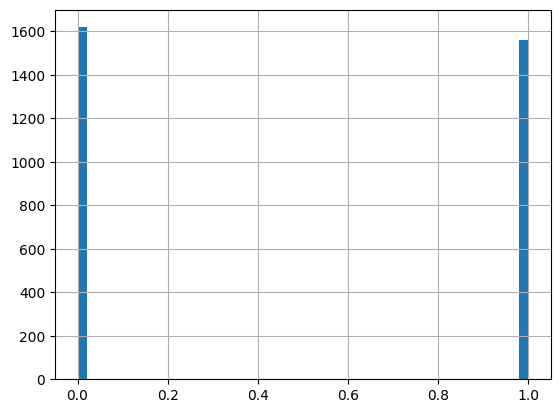

In [31]:
var = 'currentSmoker'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['currentSmoker_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['currentSmoker_NA']),'\n') # How many missing values are there?

No missing values in current smoker.

**Variable 5: cigsPerDay**

count    3156.000000
mean        8.970532
std        12.013704
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

24 



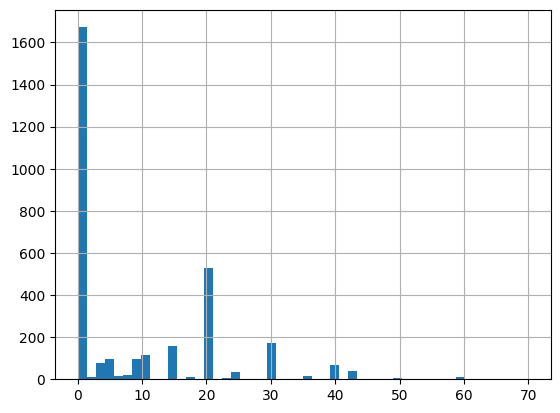

In [32]:
var = 'cigsPerDay'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['cigsPerDay_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['cigsPerDay_NA']),'\n') # How many missing values are there?

There are 24 missing values in the Cigarettes per day variables. This is a tough one because the mean is ~9 cigarettes per day but the 50th percentile of all values is 0 per day. So alot of people don't smoke at all, but if you do the average cigs per day increases quite a bit.
Because there are only 24 values missing which is 0.75% of the total responses we will drop these 24 points as imputing the data could lead to imputing values that are far from the truth.

In [39]:
df = df[df['cigsPerDay'].notna()]

count    3156.000000
mean        8.970532
std        12.013704
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

0 



<ipython-input-40-a3fdd951e4a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cigsPerDay_NA'] = df[var].isnull() # Create a bond missing dummy; long tail


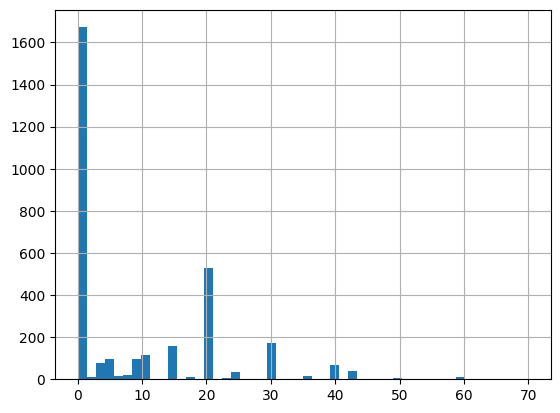

In [40]:
var = 'cigsPerDay'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['cigsPerDay_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['cigsPerDay_NA']),'\n') # How many missing values are there?

Now we have no NAs in cigsPerDay.

**Variable 6: BPMeds**

count    3119.000000
mean        0.029817
std         0.170110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64 

37 



<ipython-input-41-b5fdcd16bb86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BPMeds_NA'] = df[var].isnull() # Create a bond missing dummy; long tail


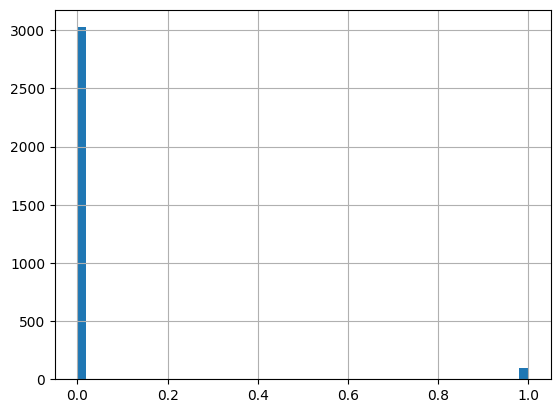

In [41]:
var = 'BPMeds'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['BPMeds_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['BPMeds_NA']),'\n') # How many missing values are there?

For these 37 missing values we will impute 0 because a great majority of people fall into the zero category.

In [42]:
var = 'BPMeds'
# Compute the value to impute:
impute_value = 0

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

<ipython-input-42-595c317bfb5e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].fillna(impute_value)


count    3156.000000
mean        0.029468
std         0.169140
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64 



<ipython-input-43-b5fdcd16bb86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BPMeds_NA'] = df[var].isnull() # Create a bond missing dummy; long tail


0 



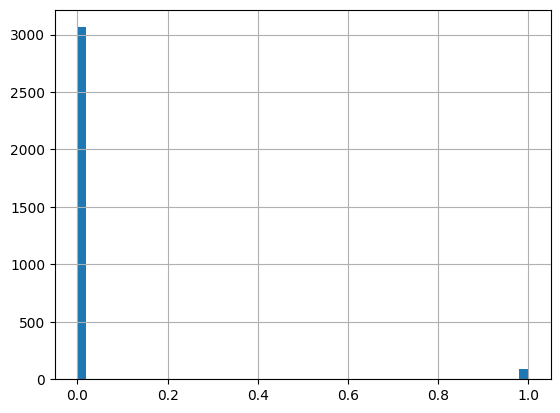

In [43]:
var = 'BPMeds'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['BPMeds_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['BPMeds_NA']),'\n') # How many missing values are there?

Now there are zero missing BPMeds values.

**Variable 7: prevalent stroke**

**Variable 8: prevalent hyp**

**Variable 9: diabetes**

**Variable 10: totChol**

**Variable 11: sys BP**

**Variable 12: diaBP**

**Variable 13: BMI**

**Variable 14: heart rate**

**Variable 15: glucose**

**Variable 16: ten year CHD**